In [169]:
# Imports e instalações

import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install scikit-learn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, f1_score)
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [170]:
# Carregando o DF

# df recebe o dataset
df = pd.read_excel(r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\australia_clima_v9.xlsx') #, sep=',')
df

,data,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao_graus,vento_rajada_direcao,vento_rajada_velocidade,...,evento_enso,mes_sin,mes_cos,emissoes_co2,estacao_num,estacao,altitude,distancia_costa,ponto_orvalho_15h,depressao_orvalho_15h
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,315.0,NW,30,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,9.4,14.2
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,67.5,ENE,39,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,12.9,12.8
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,315.0,NW,85,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,14.0,6.2
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,315.0,NW,54,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,5.3,8.8
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,157.5,SSE,50,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,5.2,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50154,2017-06-25,Perth,4.9,16.8,0.0,1.6,7.9,90.0,E,39,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,31,0,5.0,11.2
50155,2017-06-25,Melbourne,8.6,14.3,0.0,2.8,3.8,315.0,NW,35,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,31,0,4.6,8.8
50156,2017-06-25,Melbourne,5.5,13.9,0.0,2.8,3.8,337.5,NNW,44,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,31,0,3.8,8.4
50157,2017-06-25,Sydney,6.8,19.5,0.0,3.4,9.4,247.5,WSW,46,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,39,0,6.3,11.6


In [171]:
df.shape

(50159, 54)

In [172]:
df.columns.to_list()

['data',
 'localidade',
 'temp_min',
 'temp_max',
 'chuva_mm',
 'evaporacao',
 'horas_sol',
 'vento_rajada_direcao_graus',
 'vento_rajada_direcao',
 'vento_rajada_velocidade',
 'vento_direcao_9h_graus',
 'vento_direcao_9h',
 'vento_direcao_15h_graus',
 'vento_direcao_15h',
 'vento_veloc_9h',
 'vento_veloc_15h',
 'umidade_9h',
 'umidade_15h',
 'pressao_9h',
 'pressao_15h',
 'nuvem_9h',
 'nuvem_15h',
 'temp_9h',
 'temp_15h',
 'chove_amanha_vtr',
 'ano',
 'mes',
 'dia',
 'trimestre_quarter',
 'horas_sol_isna',
 'evaporacao_isna',
 'nuvem_9h_isna',
 'nuvem_15h_isna',
 'pressao_9h_isna',
 'pressao_15h_isna',
 'choveu_hoje',
 'amplitude_termica',
 'umidade_media',
 'variacao_pressao',
 'latitude',
 'longitude',
 'indice_total_enso',
 'anomalia_enso',
 'evento_enso_num',
 'evento_enso',
 'mes_sin',
 'mes_cos',
 'emissoes_co2',
 'estacao_num',
 'estacao',
 'altitude',
 'distancia_costa',
 'ponto_orvalho_15h',
 'depressao_orvalho_15h']

In [173]:
target_col = "chove_amanha_vtr"

In [174]:
# Mostrando distribuicao do target via percentual com normalize=true
print(df[target_col].value_counts(dropna=False))
print(df[target_col].value_counts(normalize=True, dropna=False))

chove_amanha_vtr
0    39438
1    10721
Name: count, dtype: int64
chove_amanha_vtr
0    0.78626
1    0.21374
Name: proportion, dtype: float64


In [175]:
date_col = 'data'

# Converte a coluna de data para datetime
# - errors='coerce' força valores ruins virarem NaT (nulo datetime)
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

In [176]:
# Remove linhas onde a data não conseguiu ser convertida
# - isso evita bagunça no split temporal
df = df.dropna(subset=[date_col]).copy()

In [177]:
# Ordena o dataset por data (passado -> futuro)
# - isso é obrigatório para split temporal honesto
df = df.sort_values(by=date_col).reset_index(drop=True)

In [178]:
# Confere rapidamente a menor e a maior data (sanidade)
print("Data mínima:", df[date_col].min())
print("Data máxima:", df[date_col].max())
print("Shape após tratamento da data:", df.shape)

Data mínima: 2007-11-01 00:00:00
Data máxima: 2017-06-25 00:00:00
Shape após tratamento da data: (50159, 54)


In [179]:
# Lista de possíveis colunas que vazam o alvo (exemplos)
# - você deve ajustar conforme o seu df.columns
possible_leak_cols = [
    "chuva_amanha_mm",
    "rain_tomorrow_mm",
    "target",
    "label"
]

# Mantém somente as colunas de vazamento que realmente existem no df
leak_cols = [c for c in possible_leak_cols if c in df.columns]

# Mostra quais serão removidas (se houver)
print("Colunas removidas por possível vazamento:", leak_cols)

# Remove as colunas de vazamento do dataset (se existirem)
if len(leak_cols) > 0:
    df = df.drop(columns=leak_cols).copy()

Colunas removidas por possível vazamento: []


In [180]:

# SEPARAÇÃO DE X E y + SPLIT TEMPORAL 80/20


# Separa o alvo (y)
# - y recebe somente a coluna target
y = df[target_col].astype(int)

# Separa as features (X)
# - X recebe tudo, exceto:
#   - target
#   - coluna de data (usaremos data só para ordenar/split; em geral não entra como feature bruta)
X = df.drop(columns=[target_col, date_col]).copy()

# Define o ponto de corte (80% treino, 20% teste) respeitando a ordem temporal
split_idx = int(len(df) * 0.8)

# Constrói os conjuntos respeitando o tempo:
# - treino = passado (0 até split_idx-1)
# - teste  = futuro (split_idx até final)
X_train = X.iloc[:split_idx].copy()
y_train = y.iloc[:split_idx].copy()

X_test  = X.iloc[split_idx:].copy()
y_test  = y.iloc[split_idx:].copy()

# Mostra shapes para validar
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)

# Confere o desbalanceamento separadamente no treino e no teste
print("\nDistribuição no TREINO:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição no TESTE:")
print(y_test.value_counts(normalize=True))


X_train: (40127, 52) y_train: (40127,)
X_test : (10032, 52) y_test : (10032,)

Distribuição no TREINO:
chove_amanha_vtr
0    0.786254
1    0.213746
Name: proportion, dtype: float64

Distribuição no TESTE:
chove_amanha_vtr
0    0.786284
1    0.213716
Name: proportion, dtype: float64


In [181]:
# IDENTIFICAR COLUNAS NUMÉRICAS E CATEGÓRICAS


# Detecta colunas numéricas automaticamente
numeric_features = X_train.select_dtypes(include=["number"]).columns.tolist()

# Detecta colunas categóricas automaticamente (texto/objeto/categoria)
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numéricas:", len(numeric_features), numeric_features[:10])
print("Categóricas:", len(categorical_features), categorical_features[:10])

Numéricas: 40 ['temp_min', 'temp_max', 'chuva_mm', 'evaporacao', 'horas_sol', 'vento_rajada_direcao_graus', 'vento_rajada_velocidade', 'vento_direcao_9h_graus', 'vento_direcao_15h_graus', 'vento_veloc_9h']
Categóricas: 6 ['localidade', 'vento_rajada_direcao', 'vento_direcao_9h', 'vento_direcao_15h', 'evento_enso', 'estacao']


In [182]:

# PIPELINE DE PREPROCESSAMENTO (NUM + CAT)


# Pipeline para colunas numéricas
# - imputer median: preenche NaN com a mediana
# - scaler: padroniza para ajudar modelos lineares
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline para colunas categóricas
# - imputer most_frequent: preenche NaN com o valor mais comum (ex.: cidade mais frequente)
# - onehot: transforma cidades em colunas 0/1 (uma por cidade)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Junta os dois pipelines em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)


In [183]:

#  BASELINE (SEM OVERSAMPLING)


baseline_model = LogisticRegression(max_iter=2000)

baseline_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", baseline_model)
])

baseline_pipe.fit(X_train, y_train)

y_pred = baseline_pipe.predict(X_test)

print("\nClassification report (baseline):")
print(classification_report(y_test, y_pred, digits=4))

print("Matriz de confusão (baseline):")
print(confusion_matrix(y_test, y_pred))



Classification report (baseline):
              precision    recall  f1-score   support

           0     0.8768    0.9474    0.9107      7888
           1     0.7250    0.5103    0.5990      2144

    accuracy                         0.8540     10032
   macro avg     0.8009    0.7288    0.7548     10032
weighted avg     0.8444    0.8540    0.8441     10032

Matriz de confusão (baseline):
[[7473  415]
 [1050 1094]]


In [184]:
#!pip install imblearn

In [185]:

#  OVERSAMPLING COM SMOTE (APENAS NO TREINO)


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(
    sampling_strategy=0.5,  # minoria vira 50% da maioria
    k_neighbors=5,
    random_state=42
)

model = LogisticRegression(max_iter=2000)

smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", model)
])

smote_pipe.fit(X_train, y_train)

y_pred_smote = smote_pipe.predict(X_test)

print("\nClassification report (SMOTE):")
print(classification_report(y_test, y_pred_smote, digits=4))

print("Matriz de confusão (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))



Classification report (SMOTE):
              precision    recall  f1-score   support

           0     0.9021    0.9066    0.9043      7888
           1     0.6499    0.6381    0.6439      2144

    accuracy                         0.8492     10032
   macro avg     0.7760    0.7723    0.7741     10032
weighted avg     0.8482    0.8492    0.8487     10032

Matriz de confusão (SMOTE):
[[7151  737]
 [ 776 1368]]


In [186]:

# PROBABILIDADES DO MODELO COM SMOTE


# Probabilidade da classe 1 (chuva)
y_proba_smote = smote_pipe.predict_proba(X_test)[:, 1]

# Sanidade: ver algumas probabilidades
print("Exemplo de probabilidades:", y_proba_smote[:10])


Exemplo de probabilidades: [0.02438496 0.00348922 0.84672308 0.36544374 0.00745113 0.00745089
 0.69029634 0.62471031 0.02303277 0.07425404]


In [187]:

# DEFINIÇÃO DA GRADE DE THRESHOLDS


# Grade de thresholds para teste
thresholds = np.arange(0.30, 0.71, 0.05)

print("Thresholds testados:", thresholds)


Thresholds testados: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7 ]


In [188]:

# 9.3) AVALIAÇÃO POR THRESHOLD


results = []

for thr in thresholds:

    # Converte probabilidade em classe usando o threshold
    y_pred_thr = (y_proba_smote >= thr).astype(int)

    # Acurácia geral (todas as classes)
    accuracy = accuracy_score(y_test, y_pred_thr)

    # Métricas focadas na classe 1 (chuva)
    recall_1 = recall_score(y_test, y_pred_thr, pos_label=1)
    precision_1 = precision_score(y_test, y_pred_thr, pos_label=1)
    f1_1 = f1_score(y_test, y_pred_thr, pos_label=1)

    # Matriz de confusão para extrair FP e FN
    cm = confusion_matrix(y_test, y_pred_thr)
    TN, FP, FN, TP = cm.ravel()

    results.append({
        "threshold": thr,
        "accuracy": accuracy,
        "recall_chuva": recall_1,
        "precision_chuva": precision_1,
        "f1_chuva": f1_1,
        "false_negatives": FN,
        "false_positives": FP
    })

In [189]:

# 9.4) RESULTADOS EM DATAFRAME


df_thresholds = pd.DataFrame(results)

# Ordena por recall decrescente (chuva é prioridade)
df_thresholds_sorted = df_thresholds.sort_values(
    by="recall_chuva",
    ascending=False
)

display(df_thresholds_sorted)


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives
0,0.30,0.804625,0.791978,0.528643,0.634055,446,1514
1,0.35,0.821870,0.762127,0.561319,0.646489,510,1277
2,0.40,0.836124,0.724347,0.595932,0.653895,591,1053
3,0.45,0.844298,0.683769,0.623830,0.652425,678,884
4,0.50,0.849183,0.638060,0.649881,0.643916,776,737
5,0.55,0.851575,0.592351,0.673740,0.630429,874,615
6,0.60,0.853768,0.548974,0.701849,0.616069,967,500
7,0.65,0.852671,0.502799,0.723490,0.593286,1066,412
8,0.70,0.852372,0.460354,0.752860,0.571346,1157,324


In [190]:

# XGBOOST - TREINO BASELINE


from xgboost import XGBClassifier

# calcula scale_pos_weight no TREINO
n_pos = (y_train == 1).sum()
n_neg = (y_train == 0).sum()
scale_pos_weight = n_neg / n_pos

print("scale_pos_weight:", scale_pos_weight)

xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1 #,
    ,reg_alpha=0.1,
    tree_method='hist',
    enable_categorical=True,
)

xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model)
])

# treino
xgb_pipe.fit(X_train, y_train)


scale_pos_weight: 3.678442345808558


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [191]:

# PROBABILIDADES (XGBOOST)


y_proba_xgb = xgb_pipe.predict_proba(X_test)[:, 1]

print("Exemplo de probabilidades:", y_proba_xgb[:10])


Exemplo de probabilidades: [2.1068959e-03 7.4315839e-04 8.7175363e-01 5.2003503e-01 1.3152638e-03
 8.0384295e-03 8.2239377e-01 6.5659797e-01 9.9106297e-02 2.4202938e-01]


In [192]:

# VARREDURA DE THRESHOLD - XGBOOST


results_xgb = []

for thr in thresholds:

    y_pred_thr = (y_proba_xgb >= thr).astype(int)

    accuracy = accuracy_score(y_test, y_pred_thr)
    recall_1 = recall_score(y_test, y_pred_thr, pos_label=1)
    precision_1 = precision_score(y_test, y_pred_thr, pos_label=1)
    f1_1 = f1_score(y_test, y_pred_thr, pos_label=1)

    cm = confusion_matrix(y_test, y_pred_thr)
    TN, FP, FN, TP = cm.ravel()

    results_xgb.append({
        "threshold": thr,
        "accuracy": accuracy,
        "recall_chuva": recall_1,
        "precision_chuva": precision_1,
        "f1_chuva": f1_1,
        "false_negatives": FN,
        "false_positives": FP
    })

df_xgb = pd.DataFrame(results_xgb)

display(df_xgb.sort_values("recall_chuva", ascending=False))


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives
0,0.30,0.788278,0.864272,0.502713,0.635678,291,1833
1,0.35,0.807516,0.841884,0.531351,0.651507,339,1592
2,0.40,0.825259,0.821362,0.562440,0.667678,383,1370
3,0.45,0.835128,0.779384,0.585905,0.668935,473,1181
4,0.50,0.847787,0.746269,0.619435,0.676962,544,983
5,0.55,0.853668,0.711754,0.642256,0.675221,618,850
6,0.60,0.858852,0.675373,0.667897,0.671614,696,720
7,0.65,0.864533,0.638993,0.700767,0.668456,774,585
8,0.70,0.867624,0.596549,0.734214,0.658260,865,463


In [193]:

# VARREDURA DE THRESHOLD - XGBOOST


results_xgb = []

for thr in thresholds:

    y_pred_thr = (y_proba_xgb >= thr).astype(int)

    accuracy = accuracy_score(y_test, y_pred_thr)
    recall_1 = recall_score(y_test, y_pred_thr, pos_label=1)
    precision_1 = precision_score(y_test, y_pred_thr, pos_label=1)
    f1_1 = f1_score(y_test, y_pred_thr, pos_label=1)

    cm = confusion_matrix(y_test, y_pred_thr)
    TN, FP, FN, TP = cm.ravel()

    results_xgb.append({
        "threshold": thr,
        "accuracy": accuracy,
        "recall_chuva": recall_1,
        "precision_chuva": precision_1,
        "f1_chuva": f1_1,
        "false_negatives": FN,
        "false_positives": FP
    })

df_xgb = pd.DataFrame(results_xgb)

display(df_xgb.sort_values("recall_chuva", ascending=False))


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives
0,0.30,0.788278,0.864272,0.502713,0.635678,291,1833
1,0.35,0.807516,0.841884,0.531351,0.651507,339,1592
2,0.40,0.825259,0.821362,0.562440,0.667678,383,1370
3,0.45,0.835128,0.779384,0.585905,0.668935,473,1181
4,0.50,0.847787,0.746269,0.619435,0.676962,544,983
5,0.55,0.853668,0.711754,0.642256,0.675221,618,850
6,0.60,0.858852,0.675373,0.667897,0.671614,696,720
7,0.65,0.864533,0.638993,0.700767,0.668456,774,585
8,0.70,0.867624,0.596549,0.734214,0.658260,865,463


In [194]:

# MATRIZ FINAL - XGBOOST


best_thr_xgb = 0.50  # ajuste conforme o df_xgb

y_pred_xgb_final = (y_proba_xgb >= best_thr_xgb).astype(int)

print(f"\nClassification report (XGBoost, thr={best_thr_xgb}):")
print(classification_report(y_test, y_pred_xgb_final, digits=4))

print("Matriz de confusão (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb_final))



Classification report (XGBoost, thr=0.5):
              precision    recall  f1-score   support

           0     0.9270    0.8754    0.9004      7888
           1     0.6194    0.7463    0.6770      2144

    accuracy                         0.8478     10032
   macro avg     0.7732    0.8108    0.7887     10032
weighted avg     0.8612    0.8478    0.8527     10032

Matriz de confusão (XGBoost):
[[6905  983]
 [ 544 1600]]


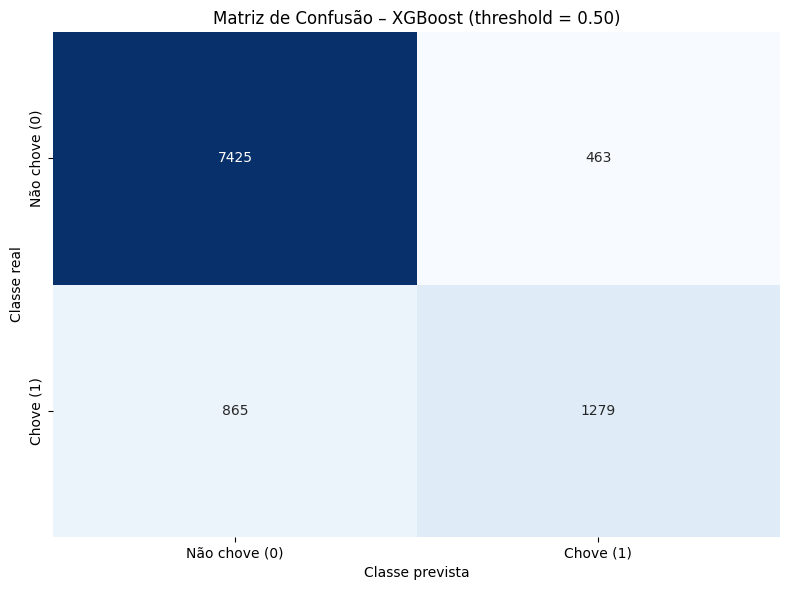

In [195]:
# Correção da sintaxe e ajuste de proporção
plt.figure(figsize=(8, 6)) 

sns.heatmap(
    cm,
    annot=True,
    fmt="d",      # 'd' para inteiros (decimal)
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)

plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
# O f-string está correto, assumindo que best_thr_xgb esteja definido
plt.title(f"Matriz de Confusão – XGBoost (threshold = {best_thr_xgb:.2f})")

plt.tight_layout()
plt.show()

In [196]:
smote = SMOTE(
    sampling_strategy=1,
    random_state=42
)


In [197]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

xgb_smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", xgb_model)
])


In [198]:
xgb_smote_pipe.fit(X_train, y_train)

y_proba_xgb_smote = xgb_smote_pipe.predict_proba(X_test)[:, 1]


In [199]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns

In [200]:

# SCALE_POS_WEIGHT (TREINO)


n_pos = int((y_train == 1).sum())
n_neg = int((y_train == 0).sum())

scale_pos_weight = n_neg / n_pos

print("Positivos (chuva):", n_pos)
print("Negativos (não chuva):", n_neg)
print("scale_pos_weight:", scale_pos_weight)


Positivos (chuva): 8577
Negativos (não chuva): 31550
scale_pos_weight: 3.678442345808558


In [201]:

#  XGBOOST + SMOTE


# Oversampling CONTROLADO (não 50/50)
# sampling_strategy=0.4 => minoria fica com 40% do tamanho da maioria
smote = SMOTE(
    sampling_strategy=1,
    k_neighbors=5,
    random_state=42
)

xgb_model_smote = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

xgb_smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", xgb_model_smote)
])

xgb_smote_pipe.fit(X_train, y_train)

y_proba_xgb_smote = xgb_smote_pipe.predict_proba(X_test)[:, 1]

print("Exemplo de probas (smote):", y_proba_xgb_smote[:10])


Exemplo de probas (smote): [0.02688688 0.00946516 0.90348756 0.4043592  0.01507831 0.01664617
 0.8598262  0.8865346  0.08730989 0.46507666]


In [202]:

# FUNÇÃO: VARREDURA DE THRESHOLDS


def sweep_thresholds(y_true, y_proba, thresholds):
    """
    y_true: labels reais (0/1)
    y_proba: probabilidade da classe 1
    thresholds: lista/array de thresholds
    
    Retorna DataFrame com métricas por threshold.
    """
    results = []
    
    for thr in thresholds:
        y_pred = (y_proba >= thr).astype(int)
        
        acc = accuracy_score(y_true, y_pred)
        rec1 = recall_score(y_true, y_pred, pos_label=1)
        prec1 = precision_score(y_true, y_pred, pos_label=1)
        f11 = f1_score(y_true, y_pred, pos_label=1)
        
        cm = confusion_matrix(y_true, y_pred)
        TN, FP, FN, TP = cm.ravel()
        
        results.append({
            "threshold": float(thr),
            "accuracy": acc,
            "recall_chuva": rec1,
            "precision_chuva": prec1,
            "f1_chuva": f11,
            "false_negatives": int(FN),
            "false_positives": int(FP)
        })
    
    return pd.DataFrame(results)


In [203]:

# XGBOOST PURO (CONTROLE)


xgb_model_control = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

xgb_control_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model_control)
])

xgb_control_pipe.fit(X_train, y_train)

y_proba_xgb_control = xgb_control_pipe.predict_proba(X_test)[:, 1]

print("Exemplo de probas (controle):", y_proba_xgb_control[:10])


Exemplo de probas (controle): [0.00929099 0.00374659 0.8916696  0.5497262  0.00441584 0.01251852
 0.78134745 0.6684881  0.14886251 0.34796205]


In [204]:

# RODAR SWEEP E COMPARAR


# Se você ainda não definiu thresholds, defina aqui
# thresholds = np.arange(0.30, 0.71, 0.05)

df_thr_control = sweep_thresholds(y_test, y_proba_xgb_control, thresholds)
df_thr_smote   = sweep_thresholds(y_test, y_proba_xgb_smote, thresholds)

print("Controle (XGB puro) - ordenado por recall:")
display(df_thr_control.sort_values("recall_chuva", ascending=False))

print("Experimental (XGB + SMOTE) - ordenado por recall:")
display(df_thr_smote.sort_values("recall_chuva", ascending=False))


Controle (XGB puro) - ordenado por recall:


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives
0,0.30,0.745514,0.903451,0.452253,0.602770,207,2346
1,0.35,0.771232,0.875933,0.480676,0.620724,266,2029
2,0.40,0.794657,0.854478,0.511732,0.640112,312,1748
3,0.45,0.811703,0.827425,0.538718,0.652566,370,1519
4,0.50,0.827951,0.792910,0.570087,0.663285,444,1282
5,0.55,0.840510,0.760261,0.600147,0.670782,514,1086
6,0.60,0.851176,0.719683,0.633676,0.673946,601,892
7,0.65,0.857955,0.672108,0.666204,0.669143,703,722
8,0.70,0.861344,0.621269,0.697017,0.656967,812,579


Experimental (XGB + SMOTE) - ordenado por recall:


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives
0,0.30,0.688596,0.932836,0.401606,0.561482,144,2980
1,0.35,0.719896,0.918377,0.427672,0.583580,175,2635
2,0.40,0.743521,0.899254,0.449942,0.599782,216,2357
3,0.45,0.765251,0.875466,0.473392,0.614503,267,2088
4,0.50,0.788876,0.853545,0.503577,0.633437,314,1804
5,0.55,0.807416,0.830224,0.531661,0.648216,364,1568
6,0.60,0.823963,0.793377,0.562500,0.658282,443,1323
7,0.65,0.837420,0.750000,0.594895,0.663503,536,1095
8,0.70,0.848585,0.700560,0.631358,0.664161,642,877



Classification report (XGBoost + SMOTE (sampling_strategy=1), thr=0.6):
              precision    recall  f1-score   support

           0     0.9368    0.8323    0.8814      7888
           1     0.5625    0.7934    0.6583      2144

    accuracy                         0.8240     10032
   macro avg     0.7496    0.8128    0.7699     10032
weighted avg     0.8568    0.8240    0.8338     10032

Matriz de confusão:
[[6565 1323]
 [ 443 1701]]


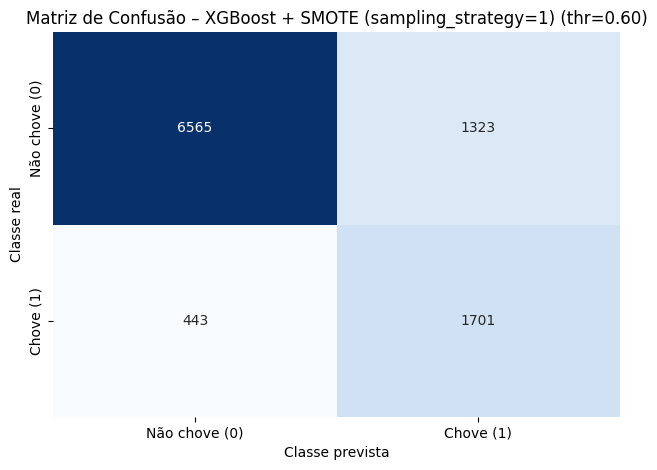

In [205]:

# MATRIZ + GRÁFICO (ESCOLHA)


# Escolha qual probabilidade usar:
# y_proba_final = y_proba_xgb_control
# modelo_nome = "XGBoost (controle)"

y_proba_final = y_proba_xgb_smote
modelo_nome = "XGBoost + SMOTE (sampling_strategy=1)"

# Escolha threshold (você decide com base na tabela)
best_thr = 0.60

y_pred_final = (y_proba_final >= best_thr).astype(int)

print(f"\nClassification report ({modelo_nome}, thr={best_thr}):")
print(classification_report(y_test, y_pred_final, digits=4))

cm = confusion_matrix(y_test, y_pred_final)
print("Matriz de confusão:")
print(cm)

# Plot
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)

plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
# Certifique-se de que 'modelo_nome' e 'best_thr' foram definidos anteriormente
plt.title(f"Matriz de Confusão – {modelo_nome} (thr={best_thr:.2f})")

plt.tight_layout()
plt.show()


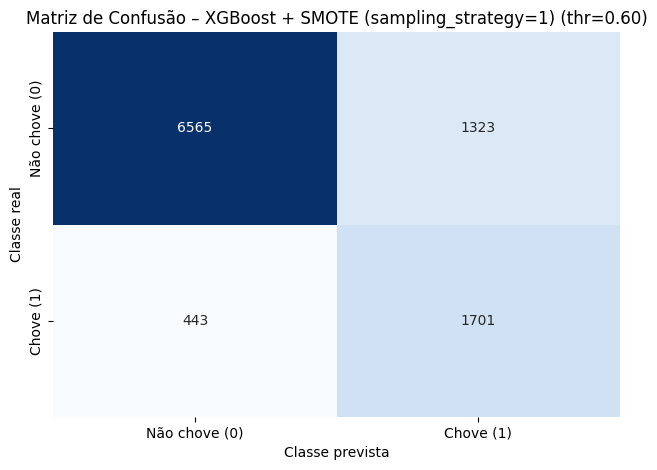

In [206]:

# MATRIZ NORMALIZADA (%)


cm_norm = cm / cm.sum(axis=1, keepdims=True)

"""
plt.figure(figsize=(7,)
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2%",
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)
plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title(f"Matriz Normalizada – {modelo_nome} (thr={best_thr})")
plt.tight_layout()
plt.show()
"""

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)

plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
# Certifique-se de que 'modelo_nome' e 'best_thr' foram definidos anteriormente
plt.title(f"Matriz de Confusão – {modelo_nome} (thr={best_thr:.2f})")

plt.tight_layout()
plt.show()


In [207]:
# X_all = tudo que o modelo precisa ver, sem o target
X_all = df.drop(columns=[COL_TARGET]).copy()

# Se a sua coluna de data NÃO é feature (normalmente não é), remova também:
X_all = X_all.drop(columns=[COL_DATA], errors="ignore")


In [208]:

# SCRIPT COMPLETO: GERAR E EXPORTAR TABELAS PARA POWER BI
# (com criação automática da pasta de saída)
#
# PRÉ-REQUISITOS (precisam existir no seu notebook antes de rodar):
# - df                  -> DataFrame original
# - xgb_smote_pipe      -> pipeline treinado (ImbPipeline com preprocess + SMOTE + XGBClassifier)
# - X_test, y_test      -> conjunto de teste


import os
import numpy as np
import pandas as pd

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)



# 0.1) Pasta de saída
BASE_DIR = r"C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados"
#r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\


# 0.2) Identidade do modelo (para versionamento dos arquivos)
MODEL_TAG = "xgb_smote_0p4_thr055_v1"

# 0.3) Threshold final escolhido
BEST_THR = 0.55

# 0.4) Nomes das colunas no seu dataset (AJUSTE SE PRECISAR)
COL_DATA = "data"
COL_LOCALIDADE = "localidade"
COL_TARGET = "chove_amanha_vtr"

# 0.5) Grade de thresholds para auditoria (AJUSTE SE QUISER)
thresholds = np.arange(0.30, 0.71, 0.05)

# 0.6) Metadados
VERSAO_DATASET = "australia_clima_v9"
MODELO_NOME = "xgb_smote_0p4"


# GARANTIR QUE A PASTA EXISTE (CORREÇÃO DO SEU ERRO)


# Cria a pasta se não existir (e não dá erro se já existir)
os.makedirs(BASE_DIR, exist_ok=True)

print("Pasta de saída confirmada:")
print(BASE_DIR)
print("Existe mesmo?", os.path.isdir(BASE_DIR))



# VALIDAÇÕES RÁPIDAS


# 2.1) Checar colunas essenciais no df
colunas_essenciais = {COL_DATA, COL_LOCALIDADE, COL_TARGET}
faltando_df = colunas_essenciais - set(df.columns)
if faltando_df:
    raise ValueError(
        f"Seu df não tem as colunas essenciais: {faltando_df}. "
        f"Ajuste COL_DATA/COL_LOCALIDADE/COL_TARGET para o nome correto."
    )

# 2.2) Checar se o pipeline existe
if "xgb_smote_pipe" not in globals():
    raise ValueError("A variável xgb_smote_pipe não existe. Treine o pipeline antes de exportar.")

# 2.3) Checar se X_test e y_test existem
if "X_test" not in globals() or "y_test" not in globals():
    raise ValueError("X_test e/ou y_test não existem. Você precisa do split de teste para auditoria e tabelas.")



# FUNÇÃO: FAIXA DE RISCO (PARA BI)


def faixa_risco(prob):
    """
    Converte probabilidade (0..1) em categoria textual
    para facilitar leitura no Power BI.
    """
    if prob < 0.30:
        return "Baixo"
    elif prob < BEST_THR:
        return "Médio"
    elif prob < 0.70:
        return "Alto"
    else:
        return "Crítico"



# FUNÇÃO: VARREDURA DE THRESHOLDS (AUDITORIA)


def sweep_thresholds(y_true, y_proba, thresholds_array):
    """
    Para cada threshold:
    - converte probabilidade em classe (0/1)
    - calcula métricas
    - extrai TN/FP/FN/TP

    Retorna DataFrame com resultados por threshold.
    """
    rows = []

    for thr in thresholds_array:
        y_pred = (y_proba >= thr).astype(int)

        acc = accuracy_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred, pos_label=1)
        prec = precision_score(y_true, y_pred, pos_label=1)
        f1 = f1_score(y_true, y_pred, pos_label=1)

        cm = confusion_matrix(y_true, y_pred)
        TN, FP, FN, TP = cm.ravel()

        rows.append({
            "threshold": float(thr),
            "accuracy": float(acc),
            "recall_chuva": float(rec),
            "precision_chuva": float(prec),
            "f1_chuva": float(f1),
            "TN": int(TN),
            "FP": int(FP),
            "FN": int(FN),
            "TP": int(TP),
        })

    return pd.DataFrame(rows)



# MONTAR X_all CORRETAMENTE (evita 'localidade' missing)


# X_all = tudo menos o target (e removemos a data se ela não for feature)
X_all = df.drop(columns=[COL_TARGET]).copy()
X_all = X_all.drop(columns=[COL_DATA], errors="ignore")

if COL_LOCALIDADE not in X_all.columns:
    raise ValueError(
        f"A coluna '{COL_LOCALIDADE}' não está em X_all. "
        f"Seu pipeline provavelmente espera essa coluna. "
        f"Verifique se COL_LOCALIDADE está correto e se você não removeu a coluna por engano."
    )

print("X_all pronto para inferência.")
print("Total de colunas:", len(X_all.columns))
print("Exemplo de colunas (primeiras 10):", list(X_all.columns)[:10])



# GERAR PREVISÕES PARA O DATASET INTEIRO (FULL)


proba_all = xgb_smote_pipe.predict_proba(X_all)[:, 1]

df_full = pd.DataFrame({
    COL_DATA: pd.to_datetime(df[COL_DATA]).dt.date,
    COL_LOCALIDADE: df[COL_LOCALIDADE],
    "y_real": df[COL_TARGET],
    "prob_chuva": proba_all,
    "pred_chuva": (proba_all >= BEST_THR).astype(int),
    "threshold_usado": BEST_THR,
    "modelo": MODELO_NOME,
    "model_tag": MODEL_TAG,
    "versao_dataset": VERSAO_DATASET
})

df_full["faixa_risco"] = df_full["prob_chuva"].apply(faixa_risco)



#  MARCAR SPLIT (train/test) E GERAR TABELA DO TESTE


df_full["split"] = "train"
df_full.loc[X_test.index, "split"] = "test"

df_test = df_full.loc[X_test.index].copy()

df_test["flag_TP"] = ((df_test["y_real"] == 1) & (df_test["pred_chuva"] == 1)).astype(int)
df_test["flag_TN"] = ((df_test["y_real"] == 0) & (df_test["pred_chuva"] == 0)).astype(int)
df_test["flag_FP"] = ((df_test["y_real"] == 0) & (df_test["pred_chuva"] == 1)).astype(int)
df_test["flag_FN"] = ((df_test["y_real"] == 1) & (df_test["pred_chuva"] == 0)).astype(int)



#  TABELA DE THRESHOLDS (AUDITORIA)


# Probabilidades no teste (consistência)
y_proba_test = xgb_smote_pipe.predict_proba(X_test)[:, 1]

df_thresholds = sweep_thresholds(y_test, y_proba_test, thresholds)
df_thresholds["modelo"] = MODELO_NOME
df_thresholds["model_tag"] = MODEL_TAG
df_thresholds["versao_dataset"] = VERSAO_DATASET



#  RESUMO FINAL DA MATRIZ (threshold escolhido)


y_pred_best = (y_proba_test >= BEST_THR).astype(int)

cm_best = confusion_matrix(y_test, y_pred_best)
TN, FP, FN, TP = cm_best.ravel()

acc_best = accuracy_score(y_test, y_pred_best)
rec_best = recall_score(y_test, y_pred_best, pos_label=1)
prec_best = precision_score(y_test, y_pred_best, pos_label=1)
f1_best = f1_score(y_test, y_pred_best, pos_label=1)

df_confusao_resumo = pd.DataFrame([{
    "threshold": float(BEST_THR),
    "TN": int(TN),
    "FP": int(FP),
    "FN": int(FN),
    "TP": int(TP),
    "accuracy": float(acc_best),
    "recall_chuva": float(rec_best),
    "precision_chuva": float(prec_best),
    "f1_chuva": float(f1_best),
    "modelo": MODELO_NOME,
    "model_tag": MODEL_TAG,
    "versao_dataset": VERSAO_DATASET
}])




# salvando

path_full = fr"{BASE_DIR}\ml_previsoes_full_{MODEL_TAG}.csv"
path_test = fr"{BASE_DIR}\ml_previsoes_test_{MODEL_TAG}.csv"
path_thr  = fr"{BASE_DIR}\ml_thresholds_{MODEL_TAG}.csv"
path_cm   = fr"{BASE_DIR}\ml_confusao_resumo_{MODEL_TAG}.csv"

df_full.to_csv(path_full, sep=";", index=False, encoding="utf-8-sig")
df_test.to_csv(path_test, sep=";", index=False, encoding="utf-8-sig")
df_thresholds.to_csv(path_thr, sep=";", index=False, encoding="utf-8-sig")
df_confusao_resumo.to_csv(path_cm, sep=";", index=False, encoding="utf-8-sig")

print("\nArquivos gerados com sucesso:")
print(path_full)
print(path_test)
print(path_thr)
print(path_cm)


Pasta de saída confirmada:
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados
Existe mesmo? True
X_all pronto para inferência.
Total de colunas: 52
Exemplo de colunas (primeiras 10): ['localidade', 'temp_min', 'temp_max', 'chuva_mm', 'evaporacao', 'horas_sol', 'vento_rajada_direcao_graus', 'vento_rajada_direcao', 'vento_rajada_velocidade', 'vento_direcao_9h_graus']

Arquivos gerados com sucesso:
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\ml_previsoes_full_xgb_smote_0p4_thr055_v1.csv
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\ml_previsoes_test_xgb_smote_0p4_thr055_v1.csv
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\ml_thresholds_xgb_smote_0p4_thr055_v1.csv
C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\ml_confusao_resumo_xgb_smote_0p4_thr055_v1.csv
